In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestClassifier
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.metrics import confusion_matrix,f1_score, accuracy_score as acc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
new_data = pd.read_csv("leukemia.csv")
print(new_data.shape)
print(new_data["gene"].unique())
new_data.gene[new_data.gene == 'ALL'] = 0
new_data.gene[new_data.gene == 'AML'] = 1
print('Updated value of gene : '+str(new_data["gene"].unique()))

(74, 5148)
['discrete' 'class' 'ALL' 'AML']
Updated value of gene : ['discrete' 'class' 0 1]


In [3]:
df = new_data.iloc[2:,:] # Removes first two tubles

print('Required data set ')
df.head()

Required data set 


gene AFFX-BioC-5_at hum_alu_at AFFX-DapX-M_at AFFX-LysX-5_at  \
2    0             88      15091            311             21   
3    0            283      11038            134            -21   
4    0            309      16692            378             67   
5    0             12      15763            268             43   
6    0            168      18128            118             -8   

  AFFX-HUMISGF3A/M97935_MA_at AFFX-HUMISGF3A/M97935_MB_at  \
2                         -13                         215   
3                        -219                         116   
4                         104                         476   
5                        -148                         155   
6                         -55                         122   

  AFFX-HUMISGF3A/M97935_3_at AFFX-HUMRGE/M10098_5_at AFFX-HUMRGE/M10098_M_at  \
2                        797                   14538                    9738   
3                        433                     615                     115   
4                       1474                    5669                    3272   
5                        415                    4850                    2293   
6                        483                    1284                    2731   

   ... M93143_at U29175_at U48730_at U58516_at X06956_at X83863_at Z17240_at  \
2  ...       384      1582       185       511       389       793       329   
3  ...       231       624       169       837       442       782       295   
4  ...       720       753       315      1199       168      1138       777   
5  ...       307       743       240       835       174       627       170   
6  ...       178       626       156       649       504       250       314   

  L49218_f_at M71243_f_at Z78285_f_at  
2          36         191         -37  
3          11          76         -14  
4          41         228         -41  
5         -50         126         -91  
6          14          56         -25  

[5 rows x 5148 columns]

In [4]:
df.isnull().sum()

gene              0
AFFX-BioC-5_at    0
hum_alu_at        0
AFFX-DapX-M_at    0
AFFX-LysX-5_at    0
                 ..
X83863_at         0
Z17240_at         0
L49218_f_at       0
M71243_f_at       0
Z78285_f_at       0
Length: 5148, dtype: int64

In [5]:
feature_set = df.drop('gene', 1)
feature_name=list(feature_set)
print('Feature names : '+str(feature_name))

Feature names : ['AFFX-BioC-5_at', 'hum_alu_at', 'AFFX-DapX-M_at', 'AFFX-LysX-5_at', 'AFFX-HUMISGF3A/M97935_MA_at', 'AFFX-HUMISGF3A/M97935_MB_at', 'AFFX-HUMISGF3A/M97935_3_at', 'AFFX-HUMRGE/M10098_5_at', 'AFFX-HUMRGE/M10098_M_at', 'AFFX-HUMRGE/M10098_3_at', 'AFFX-HUMGAPDH/M33197_5_at', 'AFFX-HUMGAPDH/M33197_M_at', 'AFFX-HUMGAPDH/M33197_3_at', 'AFFX-HSAC07/X00351_5_at', 'AFFX-HSAC07/X00351_M_at', 'AFFX-HSAC07/X00351_3_at', 'AFFX-HUMTFRR/M11507_5_at', 'AFFX-HUMTFRR/M11507_M_at', 'AFFX-HUMTFRR/M11507_3_at', 'AFFX-M27830_5_at', 'AFFX-M27830_M_at', 'AFFX-HSAC07/X00351_3_st', 'AFFX-HUMGAPDH/M33197_M_st', 'AFFX-HUMGAPDH/M33197_3_st', 'AFFX-HSAC07/X00351_M_st', 'A28102_at', 'AB000114_at', 'AB000115_at', 'AB000220_at', 'AB000409_at', 'AB000449_at', 'AB000450_at', 'AB000460_at', 'AB000462_at', 'AB000464_at', 'AB000467_at', 'AB000468_at', 'AB000584_at', 'AB000905_at', 'AB001106_at', 'AB001325_at', 'AB002314_at', 'AB002315_at', 'AB002365_at', 'AB002380_at', 'AB002559_at', 'AB003102_at', 'AB003103_

In [6]:
feature_set.head()

AFFX-BioC-5_at hum_alu_at AFFX-DapX-M_at AFFX-LysX-5_at  \
2             88      15091            311             21   
3            283      11038            134            -21   
4            309      16692            378             67   
5             12      15763            268             43   
6            168      18128            118             -8   

  AFFX-HUMISGF3A/M97935_MA_at AFFX-HUMISGF3A/M97935_MB_at  \
2                         -13                         215   
3                        -219                         116   
4                         104                         476   
5                        -148                         155   
6                         -55                         122   

  AFFX-HUMISGF3A/M97935_3_at AFFX-HUMRGE/M10098_5_at AFFX-HUMRGE/M10098_M_at  \
2                        797                   14538                    9738   
3                        433                     615                     115   
4                       1474                    5669                    3272   
5                        415                    4850                    2293   
6                        483                    1284                    2731   

  AFFX-HUMRGE/M10098_3_at  ... M93143_at U29175_at U48730_at U58516_at  \
2                    8529  ...       384      1582       185       511   
3                    1518  ...       231       624       169       837   
4                    3668  ...       720       753       315      1199   
5                    2569  ...       307       743       240       835   
6                     316  ...       178       626       156       649   

  X06956_at X83863_at Z17240_at L49218_f_at M71243_f_at Z78285_f_at  
2       389       793       329          36         191         -37  
3       442       782       295          11          76         -14  
4       168      1138       777          41         228         -41  
5       174       627       170         -50         126         -91  
6       504       250       314          14          56         -25  

[5 rows x 5147 columns]

In [7]:
target_feature = df['gene']
target_feature.head()

2    0
3    0
4    0
5    0
6    0
Name: gene, dtype: object

In [8]:
temp_feature_set=StandardScaler().fit_transform(feature_set)

In [9]:
scaled_feature_set = pd.DataFrame(temp_feature_set, columns=feature_name)
scaled_feature_set.head()

AFFX-BioC-5_at  hum_alu_at  AFFX-DapX-M_at  AFFX-LysX-5_at  \
0       -0.912181   -0.936280        1.330679        0.045416   
1        0.842926   -1.311323       -0.067011       -0.964423   
2        1.076941   -0.788133        1.859748        1.151430   
3       -1.596222   -0.874097        0.991127        0.574379   
4       -0.192137   -0.655253       -0.193356       -0.651854   

   AFFX-HUMISGF3A/M97935_MA_at  AFFX-HUMISGF3A/M97935_MB_at  \
0                     0.236442                     0.196788   
1                    -0.224387                    -0.200579   
2                     0.498175                     1.244393   
3                    -0.065558                    -0.044040   
4                     0.142487                    -0.176496   

   AFFX-HUMISGF3A/M97935_3_at  AFFX-HUMRGE/M10098_5_at  \
0                    0.244435                 2.561725   
1                   -0.371600                -0.417306   
2                    1.390191                 0.664072   
3                   -0.402063                 0.488835   
4                   -0.286980                -0.274163   

   AFFX-HUMRGE/M10098_M_at  AFFX-HUMRGE/M10098_3_at  ...  M93143_at  \
0                 2.489963                 1.794520  ...   0.428940   
1                -0.408754                -0.002931  ...  -0.425219   
2                 0.542223                 0.548277  ...   2.304741   
3                 0.247321                 0.266520  ...  -0.000930   
4                 0.379259                -0.311094  ...  -0.721104   

   U29175_at  U48730_at  U58516_at  X06956_at  X83863_at  Z17240_at  \
0   1.018678   0.103263  -0.518375   0.019140   0.027771   0.122186   
1  -0.474402  -0.067901   0.555431   0.160143   0.003223  -0.043618   
2  -0.273350   1.493964   1.747818  -0.568816   0.797680   2.306901   
3  -0.288936   0.691636   0.548844  -0.552853  -0.342677  -0.653193   
4  -0.471285  -0.206971  -0.063819   0.325090  -1.183998   0.049037   

   L49218_f_at  M71243_f_at  Z78285_f_at  
0     0.593119    -0.391378    -0.161117  
1     0.032103    -0.576990     0.415146  
2     0.705322    -0.331659    -0.261337  
3    -1.336776    -0.496289    -1.514082  
4     0.099424    -0.609271     0.139542  

[5 rows x 5147 columns]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(scaled_feature_set, target_feature, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape

((57, 5147), (15, 5147))

# Selection of features using F Classification 

In [11]:
f_start_time = time.time()
def correlation(df, threshold):
    correlation_set = set()  # Set of all the names of correlated columns
    correlation_matrix = df.corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                column_name = correlation_matrix.columns[i]  # getting the name of column
                correlation_set.add(column_name)
    return correlation_set


selected_features = correlation(X_train, 0.7)
print('Time taken by F-Classification is :'+str(time.time() - f_start_time)+' seconds')

Time taken by F-Classification is :552.5089159011841 seconds


In [12]:
selected_features = list(selected_features)

In [13]:
required_features = selected_features[:500]
print('Length of required features : '+str(len(required_features)))

Length of required features : 500


In [14]:
print(required_features)

['U77846_rna1_s_at', 'M98399_s_at', 'Z49099_at', 'X99393_s_at', 'D29805_at', 'U31875_at', 'U05259_rna1_at', 'X80822_at', 'U19251_s_at', 'X82240_rna1_at', 'X98260_at', 'U09825_at', 'M27783_s_at', 'M71243_f_at', 'U59309_at', 'HG2320-HT2416_at', 'AB003698_at', 'D84294_at', 'M14764_at', 'K02405_f_at', 'U89336_cds1_at', 'U18259_at', 'D13627_at', 'U78556_at', 'D10040_at', 'M80563_at', 'M88458_at', 'X16323_at', 'X04654_s_at', 'S40719_s_at', 'U48296_at', 'M63256_at', 'D49738_at', 'U59286_at', 'Z24724_at', 'J03473_at', 'Z25521_s_at', 'AF007875_at', 'M25667_at', 'L24804_at', 'U41068_cds2_s_at', 'L18877_f_at', 'U83246_at', 'X81625_at', 'U66077_at', 'U18291_at', 'U51336_at', 'X00368_xpt2_at', 'M18700_s_at', 'M97287_at', 'D88378_at', 'D79995_at', 'HG3355-HT3532_at', 'D13748_at', 'X54326_at', 'X67325_at', 'X01388_at', 'S78271_s_at', 'U17894_at', 'J04132_at', 'X63422_at', 'Y00264_at', 'X03068_f_at', 'D14710_at', 'X57346_at', 'Z14244_at', 'S75213_s_at', 'X04602_s_at', 'J05016_rna1_s_at', 'Z30643_at', 

In [15]:
X_train = X_train[required_features]
X_train.head()

U77846_rna1_s_at  M98399_s_at  Z49099_at  X99393_s_at  D29805_at  \
55         -1.655329    -0.395562  -0.498824     0.043980  -0.669005   
70          1.160822     4.062006   0.237684     0.393145  -0.532292   
62          0.555574     0.493772  -0.277462     1.380437  -0.517459   
43          0.930728    -0.606997  -0.486527     2.175088  -0.466514   
4          -0.759963    -0.565582   0.208989    -0.305185  -0.491664   

    U31875_at  U05259_rna1_at  X80822_at  U19251_s_at  X82240_rna1_at  ...  \
55  -0.051652       -0.406324   2.523054    -1.271559       -0.012181  ...   
70   2.786331       -0.597228   1.560207     3.873559       -0.718137  ...   
62  -0.373430       -0.902608   0.776463    -1.004013       -0.638422  ...   
43   2.981508        2.145513   0.224261     1.465644        0.832469  ...   
4   -0.494757        0.832548  -0.428714    -0.983432        0.576819  ...   

    D32001_at  X99664_at  D42046_at  HG2639-HT2735_s_at  M81780_cds5_at  \
55  -0.591417   0.160277  -0.895896           -0.658630       -1.091045   
70   2.824178   0.249504   2.092051            1.329150        3.060557   
62   0.587514  -0.892596  -0.421872           -0.015383       -0.009929   
43   3.011485   2.831124   1.676615           -0.320079       -0.068526   
4   -0.453691  -1.148378  -0.911874           -0.368443        0.259618   

    L09190_rna1_at  U64105_at  U42412_at  Y11215_at  Z25535_at  
55       -0.240885  -0.076784   0.149967  -0.443323  -0.569962  
70        2.773119   5.000189   1.244605   0.799974   1.083771  
62        2.997847   0.049240   0.066058   0.720276  -0.930328  
43        1.345433  -0.132179   1.214092   1.306060  -0.856280  
4        -0.227666  -0.229121   1.313258  -0.606705   0.293928  

[5 rows x 500 columns]

In [16]:
X_test = X_test[required_features]
X_test.head()

U77846_rna1_s_at  M98399_s_at  Z49099_at  X99393_s_at  D29805_at  \
26          0.145407    -0.341069  -0.609506     2.849337  -0.606452   
27          0.080380    -0.441337   0.010856    -0.774751  -0.590975   
48          0.205431    -0.471853  -0.098459    -0.582108  -0.663846   
22          0.250450    -0.524167  -0.158582    -1.160036  -0.657398   
30          1.110801     0.966775   0.051849    -1.521240   0.753592   

    U31875_at  U05259_rna1_at  X80822_at  U19251_s_at  X82240_rna1_at  ...  \
26   1.114137        0.442063   0.432928    -0.170503        0.898696  ...   
27   0.697407       -0.717044  -0.765776     1.342161       -0.684922  ...   
48  -0.020001        0.181406   0.420197    -0.839369        1.522723  ...   
22  -0.436731       -0.663978   0.402071    -0.767337       -0.660162  ...   
30   0.871484       -0.881582  -0.760165    -0.561532       -0.650701  ...   

    D32001_at  X99664_at  D42046_at  HG2639-HT2735_s_at  M81780_cds5_at  \
26   2.218185   1.849632   1.436940           -0.895616        0.368022   
27   0.986919   0.624255   0.675306            0.245786        0.710815   
48  -1.219445  -1.166223  -1.556333           -0.397462       -0.771691   
22  -0.271893   0.850296   0.419653           -1.301878       -0.147632   
30   0.356135   2.474218   0.675306            1.232421       -1.044167   

    L09190_rna1_at  U64105_at  U42412_at  Y11215_at  Z25535_at  
26        1.239678  -0.529640   0.764032  -0.264001  -0.609454  
27        0.168913   1.366262   0.462721   0.150431   0.521008  
48       -1.205895  -0.832929  -1.699857  -0.582796  -0.930328  
22       -0.439175   0.474399   0.546630   0.182310  -0.806915  
30       -0.095473  -0.673668   0.207178  -0.156408  -0.140485  

[5 rows x 500 columns]

In [17]:
y_train.shape, y_test.shape

((57,), (15,))

# Sequential Forward Search

In [18]:
forward_start_time = time.time()
feature_selector = SequentialFeatureSelector(SVC(),
                                             k_features = 100,
                                             forward= True,
                                             floating = False,
                                             verbose= 2,
                                             cv = 3,
                                             n_jobs= -1).fit(X_train, y_train)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   19.4s finished

[2020-10-20 18:23:59] Features: 1/100 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 499 out of 499 | elapsed:    1.8s finished

[2020-10-20 18:24:01] Features: 2/100 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 498 out of 498 | elapsed:    1.7s finished

[2020-10-20 18:24:03] Features: 3/100 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 497 out of 497 | elapsed:    1.7s finished

[2020-1

[Parallel(n_jobs=-1)]: Done 464 out of 471 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 471 out of 471 | elapsed:    1.2s finished

[2020-10-20 18:24:39] Features: 30/100 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 470 out of 470 | elapsed:    1.2s finished

[2020-10-20 18:24:40] Features: 31/100 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 469 out of 469 | elapsed:    1.2s finished

[2020-10-20 18:24:42] Features: 32/100 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 468 out of 468 | elapsed:    1.2s finished

[2020-10-20 18:24:43] Features: 33/100 -- score: nan[Parallel

[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 440 out of 440 | elapsed:    1.1s finished

[2020-10-20 18:25:18] Features: 61/100 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 439 out of 439 | elapsed:    1.3s finished

[2020-10-20 18:25:19] Features: 62/100 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 438 out of 438 | elapsed:    1.4s finished

[2020-10-20 18:25:20] Features: 63/100 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 437 out of 437 | elapsed:    1.3s finished

[2020-10-20 18:25:22] Features: 64/100 -- score: nan[Parallel(n_jobs=-1)]: Using

[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 408 out of 408 | elapsed:    1.3s finished

[2020-10-20 18:26:01] Features: 93/100 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 407 out of 407 | elapsed:    1.3s finished

[2020-10-20 18:26:03] Features: 94/100 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 406 out of 406 | elapsed:    1.3s finished

[2020-10-20 18:26:04] Features: 95/100 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:    1.3s finished

[2020-10-20 18:26:05] Features: 96/100 -- score: nan[Parallel(n_jobs=-1)]: Using

In [19]:
print('Time taken by Forward Feature Selection is :'+str(int(time.time() - forward_start_time))+' seconds')

Time taken by Forward Feature Selection is :151 seconds


In [20]:
feature_selector.k_feature_names_

('U77846_rna1_s_at',
 'M98399_s_at',
 'Z49099_at',
 'X99393_s_at',
 'D29805_at',
 'U31875_at',
 'U05259_rna1_at',
 'X80822_at',
 'U19251_s_at',
 'X82240_rna1_at',
 'X98260_at',
 'U09825_at',
 'M27783_s_at',
 'M71243_f_at',
 'U59309_at',
 'HG2320-HT2416_at',
 'AB003698_at',
 'D84294_at',
 'M14764_at',
 'K02405_f_at',
 'U89336_cds1_at',
 'U18259_at',
 'D13627_at',
 'U78556_at',
 'D10040_at',
 'M80563_at',
 'M88458_at',
 'X16323_at',
 'X04654_s_at',
 'S40719_s_at',
 'U48296_at',
 'M63256_at',
 'D49738_at',
 'U59286_at',
 'Z24724_at',
 'J03473_at',
 'Z25521_s_at',
 'AF007875_at',
 'M25667_at',
 'L24804_at',
 'U41068_cds2_s_at',
 'L18877_f_at',
 'U83246_at',
 'X81625_at',
 'U66077_at',
 'U18291_at',
 'U51336_at',
 'X00368_xpt2_at',
 'M18700_s_at',
 'M97287_at',
 'D88378_at',
 'D79995_at',
 'HG3355-HT3532_at',
 'D13748_at',
 'X54326_at',
 'X67325_at',
 'X01388_at',
 'S78271_s_at',
 'U17894_at',
 'J04132_at',
 'X63422_at',
 'Y00264_at',
 'X03068_f_at',
 'D14710_at',
 'X57346_at',
 'Z14244_at'

In [21]:
feature_columns = list(feature_selector.k_feature_idx_)

In [22]:
X_train2=X_train.iloc[:, feature_columns]
X_train2.head()

U77846_rna1_s_at  M98399_s_at  Z49099_at  X99393_s_at  D29805_at  \
55         -1.655329    -0.395562  -0.498824     0.043980  -0.669005   
70          1.160822     4.062006   0.237684     0.393145  -0.532292   
62          0.555574     0.493772  -0.277462     1.380437  -0.517459   
43          0.930728    -0.606997  -0.486527     2.175088  -0.466514   
4          -0.759963    -0.565582   0.208989    -0.305185  -0.491664   

    U31875_at  U05259_rna1_at  X80822_at  U19251_s_at  X82240_rna1_at  ...  \
55  -0.051652       -0.406324   2.523054    -1.271559       -0.012181  ...   
70   2.786331       -0.597228   1.560207     3.873559       -0.718137  ...   
62  -0.373430       -0.902608   0.776463    -1.004013       -0.638422  ...   
43   2.981508        2.145513   0.224261     1.465644        0.832469  ...   
4   -0.494757        0.832548  -0.428714    -0.983432        0.576819  ...   

    X67337_at  D31889_at  D86968_at  X74104_at  X06482_at  U04241_at  \
55  -0.235621  -1.030963  -0.075954  -0.582378  -0.246236  -0.409956   
70   0.224170   2.261932  -0.908021  -0.453872  -0.085016  -0.631521   
62   0.271735  -0.997015   0.423874  -0.347062  -0.740298  -0.391256   
43  -0.219766   0.421985  -2.572154  -1.241595  -0.417858  -0.100559   
4    1.270591  -0.406331   0.285686   0.836190  -0.241036  -0.330624   

    X13444_at  M73720_at  X76029_at  X14448_at  
55   0.033605  -0.527912  -0.290099  -0.760681  
70   1.472019   0.392431   0.372283   2.037597  
62  -0.102139  -0.417175  -0.367376  -0.768784  
43   0.586109   0.151271   1.056744   1.119244  
4   -1.126175  -0.422097  -0.356337   0.001013  

[5 rows x 100 columns]

In [23]:
X_test2=X_test.iloc[:, feature_columns]
X_test2.head()

U77846_rna1_s_at  M98399_s_at  Z49099_at  X99393_s_at  D29805_at  \
26          0.145407    -0.341069  -0.609506     2.849337  -0.606452   
27          0.080380    -0.441337   0.010856    -0.774751  -0.590975   
48          0.205431    -0.471853  -0.098459    -0.582108  -0.663846   
22          0.250450    -0.524167  -0.158582    -1.160036  -0.657398   
30          1.110801     0.966775   0.051849    -1.521240   0.753592   

    U31875_at  U05259_rna1_at  X80822_at  U19251_s_at  X82240_rna1_at  ...  \
26   1.114137        0.442063   0.432928    -0.170503        0.898696  ...   
27   0.697407       -0.717044  -0.765776     1.342161       -0.684922  ...   
48  -0.020001        0.181406   0.420197    -0.839369        1.522723  ...   
22  -0.436731       -0.663978   0.402071    -0.767337       -0.660162  ...   
30   0.871484       -0.881582  -0.760165    -0.561532       -0.650701  ...   

    X67337_at  D31889_at  D86968_at  X74104_at  X06482_at  U04241_at  \
26   0.525413   1.257090  -2.827949  -1.159819   0.310233  -1.646979   
27  -0.933235  -0.256963  -1.134414   0.095197  -0.033010  -0.343090   
48  -0.267331  -0.603226   0.767873  -1.034651  -0.599880  -0.306824   
22   0.446138  -1.146384   0.062233  -0.599067  -0.610282   0.750001   
30  -0.489299   1.033037   0.318028  -0.355407   1.641599   0.304038   

    X13444_at  M73720_at  X76029_at  X14448_at  
26   1.788756  -0.208007   0.295005   0.430478  
27   0.574201   0.591756   0.118370   0.554726  
48  -1.300023  -0.842895  -0.908321  -1.065898  
22  -0.335524  -0.208007   0.041092  -1.022681  
30   1.531556  -0.062819   0.626196   0.468293  

[5 rows x 100 columns]

In [24]:
y_train2 = np.array([a+1 for a in y_train]) 
print(y_train2)

y_test2 = np.array([a+1 for a in y_test])

print(y_test2)

[1 2 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1 2 1 1 1 1 1 1 2 1 1 1 2 1
 2 1 2 1 1 1 2 1 2 1 1 1 2 1 1 2 2 2 1 1]
[1 2 1 1 2 1 1 2 2 2 1 2 2 1 2]


# KNN Classifier

In [25]:
temp_fscore=0
temp_cm = np.zeros([2,2])

sum =0
for i in range(1,20):
    classfier = KNeighborsClassifier(n_neighbors=i)
    classfier.fit(X_train2, y_train2) 
    print('KNN Classfier for '+str(i)+ ' neighbors:')
    y_train_prediction = classfier.predict(X_train2)
    print('Training accuracy on selected features for '+str(i)+ ' neighbors: %.4f' % (100*acc(y_train2, y_train_prediction)))

    y_test_prediction = classfier.predict(X_test2)
    print('Testing accuracy on selected features for '+str(i)+ ' neighbors: %.4f' %(100*acc(y_test2, y_test_prediction)))
    
    f_score_knn = f1_score(y_test2, y_test_prediction)
    temp_fscore= temp_fscore + f_score_knn
    
    cm = confusion_matrix(y_test2, y_test_prediction)
    cm= np.array(cm)
    temp_cm = temp_cm + cm
    
    sum = sum + 100*acc(y_test2, y_test_prediction)
    if i !=1:
        if max_test_accuracy < (100*acc(y_test2, y_test_prediction)):
            max_test_accuracy = (100*acc(y_test2, y_test_prediction))
            max_y_test_prediction = y_test_prediction
            index = i
    else:
        max_test_accuracy = (100*acc(y_test2, y_test_prediction))
        max_y_test_prediction = y_test_prediction
        index = i

print('Average Testing accuracy obtained on selected features by KNN Classifier: %.4f' % (sum/19))                        
print('Maximum Testing accuracy obtained on selected features for '+str(index)+ ' neighbors: %.4f' % max_test_accuracy)                   

KNN Classfier for 1 neighbors:
Training accuracy on selected features for 1 neighbors: 100.0000
Testing accuracy on selected features for 1 neighbors: 93.3333
KNN Classfier for 2 neighbors:
Training accuracy on selected features for 2 neighbors: 89.4737
Testing accuracy on selected features for 2 neighbors: 86.6667
KNN Classfier for 3 neighbors:
Training accuracy on selected features for 3 neighbors: 92.9825
Testing accuracy on selected features for 3 neighbors: 93.3333
KNN Classfier for 4 neighbors:
Training accuracy on selected features for 4 neighbors: 87.7193
Testing accuracy on selected features for 4 neighbors: 80.0000
KNN Classfier for 5 neighbors:
Training accuracy on selected features for 5 neighbors: 89.4737
Testing accuracy on selected features for 5 neighbors: 93.3333
KNN Classfier for 6 neighbors:
Training accuracy on selected features for 6 neighbors: 84.2105
Testing accuracy on selected features for 6 neighbors: 80.0000
KNN Classfier for 7 neighbors:
Training accuracy on

In [26]:
cm = confusion_matrix(y_test2, max_y_test_prediction)
print('Maximum Confusion matrix :',cm)
print('Average Confusion matrix is :',(temp_cm/19))

Maximum Confusion matrix : [[7 0]
 [1 7]]
Average Confusion matrix is : [[7.         0.        ]
 [4.52631579 3.47368421]]


Confusion Matrix of KNN Classifier:


<AxesSubplot:>

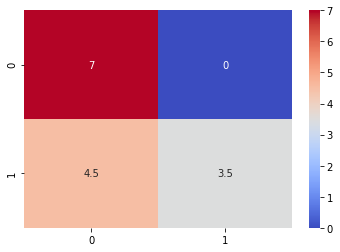

In [27]:
print('Confusion Matrix of KNN Classifier:')
sns.heatmap((temp_cm/19),annot = True,cmap='coolwarm')

In [28]:
f_score_knn = f1_score(y_test2, max_y_test_prediction)

print('Maximum F-Score is : '+str(f_score_knn))
print('Average F-Score is : '+str(temp_fscore/19))

Maximum F-Score is : 0.9333333333333333
Average F-Score is : 0.7674963337135406


# SVM(Support Vector Machine)

In [29]:
classfier_svc = SVC()
classfier_svc.fit(X_train2,y_train2)
print('SVM Classfier')
y_train_prediction_svc = classfier_svc.predict(X_train2)
print('Training accuracy on selected features: %.4f' % (100*acc(y_train2, y_train_prediction_svc)))

y_test_prediction_svc = classfier_svc.predict(X_test2)
print('Testing accuracy on selected features: %.4f' % (100*acc(y_test2, y_test_prediction_svc)))

SVM Classfier
Training accuracy on selected features: 100.0000
Testing accuracy on selected features: 80.0000


In [30]:
cm_svc = confusion_matrix(y_test2, y_test_prediction_svc)
print(cm_svc)

[[7 0]
 [3 5]]


<AxesSubplot:>

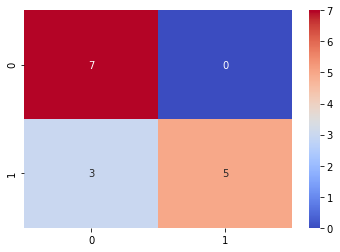

In [31]:
sns.heatmap(cm_svc,annot = True,cmap='coolwarm', fmt = "d")

In [32]:
f_score_knn = f1_score(y_test2, y_test_prediction_svc)

print(' F-Score is : '+str(f_score_knn))

 F-Score is : 0.8235294117647058


# Backward Feature Selection

In [33]:
backward_start_time = time.time()
feature_selector = SequentialFeatureSelector(SVC(),
                                             k_features = 400,
                                             forward= False,
                                             floating = False,
                                             verbose= 2,
                                             cv = 3,
                                             n_jobs= -1).fit(X_train, y_train)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.7s finished

[2020-10-20 18:26:14] Features: 499/400 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 499 out of 499 | elapsed:    1.6s finished

[2020-10-20 18:26:16] Features: 498/400 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 498 out of 498 | elapsed:    1.6s finished

[2020-10-20 18:26:18] Features: 497/400 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 497 out of 497 | elapsed:    1.6s finished

[

[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 469 out of 469 | elapsed:    1.6s finished

[2020-10-20 18:27:05] Features: 468/400 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 468 out of 468 | elapsed:    1.6s finished

[2020-10-20 18:27:06] Features: 467/400 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 467 out of 467 | elapsed:    1.7s finished

[2020-10-20 18:27:08] Features: 466/400 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 466 out of 466 | elapsed:    1.6s finished

[2020-10-20 18:27:10] Features: 465/400 -- score: nan[Parallel(n_jobs=-1)]: U

[Parallel(n_jobs=-1)]: Done 438 out of 438 | elapsed:    1.7s finished

[2020-10-20 18:27:53] Features: 437/400 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 437 out of 437 | elapsed:    1.7s finished

[2020-10-20 18:27:54] Features: 436/400 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 436 out of 436 | elapsed:    1.7s finished

[2020-10-20 18:27:56] Features: 435/400 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 435 out of 435 | elapsed:    1.7s finished

[2020-10-20 18:27:58] Features: 434/400 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(

[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 406 out of 406 | elapsed:    1.5s finished

[2020-10-20 18:28:46] Features: 405/400 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:    1.5s finished

[2020-10-20 18:28:47] Features: 404/400 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 404 out of 404 | elapsed:    1.5s finished

[2020-10-20 18:28:49] Features: 403/400 -- score: nan[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 403 out of 403 | elapsed:    1.5s finished

[2020-10-20 18:28:51] Features: 402/400 -- score: nan[Parallel(n_jobs=-1)]: U

In [34]:
print('Time taken by Backward Feature Selection is :'+str(int(time.time() - backward_start_time))+' seconds')

Time taken by Backward Feature Selection is :161 seconds


In [35]:
feature_selector.k_feature_names_

('U77846_rna1_s_at',
 'M98399_s_at',
 'Z49099_at',
 'X99393_s_at',
 'D29805_at',
 'U31875_at',
 'U05259_rna1_at',
 'X80822_at',
 'U19251_s_at',
 'X82240_rna1_at',
 'X98260_at',
 'U09825_at',
 'M27783_s_at',
 'M71243_f_at',
 'U59309_at',
 'HG2320-HT2416_at',
 'AB003698_at',
 'D84294_at',
 'M14764_at',
 'K02405_f_at',
 'U89336_cds1_at',
 'U18259_at',
 'D13627_at',
 'U78556_at',
 'D10040_at',
 'M80563_at',
 'M88458_at',
 'X16323_at',
 'X04654_s_at',
 'S40719_s_at',
 'U48296_at',
 'M63256_at',
 'D49738_at',
 'U59286_at',
 'Z24724_at',
 'J03473_at',
 'Z25521_s_at',
 'AF007875_at',
 'M25667_at',
 'L24804_at',
 'U41068_cds2_s_at',
 'L18877_f_at',
 'U83246_at',
 'X81625_at',
 'U66077_at',
 'U18291_at',
 'U51336_at',
 'X00368_xpt2_at',
 'M18700_s_at',
 'M97287_at',
 'D88378_at',
 'D79995_at',
 'HG3355-HT3532_at',
 'D13748_at',
 'X54326_at',
 'X67325_at',
 'X01388_at',
 'S78271_s_at',
 'U17894_at',
 'J04132_at',
 'X63422_at',
 'Y00264_at',
 'X03068_f_at',
 'D14710_at',
 'X57346_at',
 'Z14244_at'

In [36]:
feature_columns = list(feature_selector.k_feature_idx_)
print(feature_columns)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [37]:
X_train3=X_train.iloc[:, feature_columns]
X_train3.head()

U77846_rna1_s_at  M98399_s_at  Z49099_at  X99393_s_at  D29805_at  \
55         -1.655329    -0.395562  -0.498824     0.043980  -0.669005   
70          1.160822     4.062006   0.237684     0.393145  -0.532292   
62          0.555574     0.493772  -0.277462     1.380437  -0.517459   
43          0.930728    -0.606997  -0.486527     2.175088  -0.466514   
4          -0.759963    -0.565582   0.208989    -0.305185  -0.491664   

    U31875_at  U05259_rna1_at  X80822_at  U19251_s_at  X82240_rna1_at  ...  \
55  -0.051652       -0.406324   2.523054    -1.271559       -0.012181  ...   
70   2.786331       -0.597228   1.560207     3.873559       -0.718137  ...   
62  -0.373430       -0.902608   0.776463    -1.004013       -0.638422  ...   
43   2.981508        2.145513   0.224261     1.465644        0.832469  ...   
4   -0.494757        0.832548  -0.428714    -0.983432        0.576819  ...   

    M10901_at  M92843_s_at  X53800_s_at  U18009_at  U68105_s_at  U43965_at  \
55   0.211864    -0.749879    -0.204168  -0.885443    -1.265387  -0.932678   
70   0.660589    -0.237153     0.343349  -0.398305    -0.170573   2.545186   
62  -0.332333    -0.499795    -0.038472   0.414374    -0.998860  -1.147361   
43  -0.439741    -0.762438     0.033569  -0.187524    -0.886098   1.471771   
4    0.288243    -0.348022    -0.470722   0.435452     0.892462  -0.771666   

    U94585_at  J02621_s_at  M92439_at  D87078_at  
55  -0.994718    -0.855241   0.095454  -0.521091  
70   2.482786    -0.671276  -0.487794   0.843151  
62  -0.204773    -0.471698   0.522368   0.117571  
43   0.967026    -0.263295   0.239763  -0.014696  
4    0.471489     0.083591   2.067677   0.697657  

[5 rows x 400 columns]

In [38]:
X_test3=X_test.iloc[:, feature_columns]
X_test3.head()

U77846_rna1_s_at  M98399_s_at  Z49099_at  X99393_s_at  D29805_at  \
26          0.145407    -0.341069  -0.609506     2.849337  -0.606452   
27          0.080380    -0.441337   0.010856    -0.774751  -0.590975   
48          0.205431    -0.471853  -0.098459    -0.582108  -0.663846   
22          0.250450    -0.524167  -0.158582    -1.160036  -0.657398   
30          1.110801     0.966775   0.051849    -1.521240   0.753592   

    U31875_at  U05259_rna1_at  X80822_at  U19251_s_at  X82240_rna1_at  ...  \
26   1.114137        0.442063   0.432928    -0.170503        0.898696  ...   
27   0.697407       -0.717044  -0.765776     1.342161       -0.684922  ...   
48  -0.020001        0.181406   0.420197    -0.839369        1.522723  ...   
22  -0.436731       -0.663978   0.402071    -0.767337       -0.660162  ...   
30   0.871484       -0.881582  -0.760165    -0.561532       -0.650701  ...   

    M10901_at  M92843_s_at  X53800_s_at  U18009_at  U68105_s_at  U43965_at  \
26  -0.234473    -0.443463     0.289317  -0.363175    -0.634434   0.645242   
27  -0.637848    -0.138123    -0.200566   1.091215     1.555193   1.139012   
48  -0.511346     0.315760    -0.395079  -1.084514    -1.308954  -0.224224   
22  -0.616366    -0.750238    -0.654429   0.917906    -0.781024   0.269546   
30  -0.181963     1.037668     0.400982  -0.876075     1.268164   1.589846   

    U94585_at  J02621_s_at  M92439_at  D87078_at  
26   0.296593    -0.473056  -0.169112  -0.736498  
27  -0.152305    -0.619006  -0.024803  -0.666585  
48  -1.108400    -0.008052  -0.229241  -0.725161  
22  -0.140645    -0.443187  -0.187151  -0.445510  
30  -0.744034    -0.456764  -0.848567  -1.269346  

[5 rows x 400 columns]

In [39]:
y_train3 = np.array([a+1 for a in y_train]) 
print(y_train2)

y_test3 = np.array([a+1 for a in y_test])

print(y_test2)

[1 2 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1 2 1 1 1 1 1 1 2 1 1 1 2 1
 2 1 2 1 1 1 2 1 2 1 1 1 2 1 1 2 2 2 1 1]
[1 2 1 1 2 1 1 2 2 2 1 2 2 1 2]


# KNN Classifier

In [40]:
temp_fscore=0
temp_cm = np.zeros([2,2])

sum =0
for i in range(1,20):
    classfier = KNeighborsClassifier(n_neighbors=i)
    classfier.fit(X_train3, y_train3) 
    print('KNN Classfier for '+str(i)+ ' neighbors:')
    y_train_prediction = classfier.predict(X_train3)
    print('Training accuracy on selected features for '+str(i)+ ' neighbors: %.4f' % (100*acc(y_train3, y_train_prediction)))

    y_test_prediction = classfier.predict(X_test3)
    print('Testing accuracy on selected features for '+str(i)+ ' neighbors: %.4f' %(100*acc(y_test3, y_test_prediction)))
    
    f_score_knn = f1_score(y_test3, y_test_prediction)
    temp_fscore= temp_fscore + f_score_knn
    
    cm = confusion_matrix(y_test3, y_test_prediction)
    cm= np.array(cm)
    temp_cm = temp_cm + cm
    
    sum = sum + 100*acc(y_test3, y_test_prediction)
    if i !=1:
        if max_test_accuracy < (100*acc(y_test3, y_test_prediction)):
            max_test_accuracy = (100*acc(y_test3, y_test_prediction))
            max_y_test_prediction = y_test_prediction
            index = i
    else:
        max_test_accuracy = (100*acc(y_test3, y_test_prediction))
        max_y_test_prediction = y_test_prediction
        index = i

print('Average Testing accuracy obtained on selected features by KNN Classifier: %.4f' % (sum/19))                        
print('Maximum Testing accuracy obtained on selected features for '+str(index)+ ' neighbors: %.4f' % max_test_accuracy)                   

KNN Classfier for 1 neighbors:
Training accuracy on selected features for 1 neighbors: 100.0000
Testing accuracy on selected features for 1 neighbors: 93.3333
KNN Classfier for 2 neighbors:
Training accuracy on selected features for 2 neighbors: 91.2281
Testing accuracy on selected features for 2 neighbors: 80.0000
KNN Classfier for 3 neighbors:
Training accuracy on selected features for 3 neighbors: 91.2281
Testing accuracy on selected features for 3 neighbors: 93.3333
KNN Classfier for 4 neighbors:
Training accuracy on selected features for 4 neighbors: 91.2281
Testing accuracy on selected features for 4 neighbors: 80.0000
KNN Classfier for 5 neighbors:
Training accuracy on selected features for 5 neighbors: 91.2281
Testing accuracy on selected features for 5 neighbors: 86.6667
KNN Classfier for 6 neighbors:
Training accuracy on selected features for 6 neighbors: 91.2281
Testing accuracy on selected features for 6 neighbors: 86.6667
KNN Classfier for 7 neighbors:
Training accuracy on

In [41]:
cm = confusion_matrix(y_test3, max_y_test_prediction)
print('Maximum Confusion matrix :',cm)
print('Average Confusion matrix is :',(temp_cm/19))

Maximum Confusion matrix : [[7 0]
 [1 7]]
Average Confusion matrix is : [[7.         0.        ]
 [3.89473684 4.10526316]]


Confusion Matrix of KNN Classifier:


<AxesSubplot:>

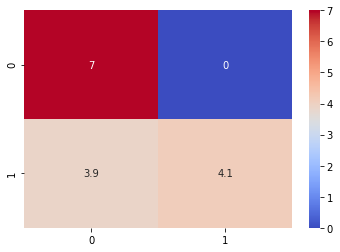

In [42]:
print('Confusion Matrix of KNN Classifier:')
sns.heatmap((temp_cm/19),annot = True,cmap='coolwarm')

In [43]:
f_score_knn = f1_score(y_test3, max_y_test_prediction)

print('Maximum F-Score is : '+str(f_score_knn))
print('Average F-Score is : '+str(temp_fscore/19))

Maximum F-Score is : 0.9333333333333333
Average F-Score is : 0.79264253254395


# SVM(Support Vector Machine)

In [44]:
classfier_svc = SVC()
classfier_svc.fit(X_train3,y_train3)
print('SVM Classfier')
y_train_prediction_svc = classfier_svc.predict(X_train3)
print('Training accuracy on selected features: %.4f' % (100*acc(y_train3, y_train_prediction_svc)))

y_test_prediction_svc = classfier_svc.predict(X_test3)
print('Testing accuracy on selected features: %.4f' % (100*acc(y_test3, y_test_prediction_svc)))

SVM Classfier
Training accuracy on selected features: 100.0000
Testing accuracy on selected features: 80.0000


In [45]:
cm_svc = confusion_matrix(y_test3, y_test_prediction_svc)
print(cm_svc)

[[7 0]
 [3 5]]


<AxesSubplot:>

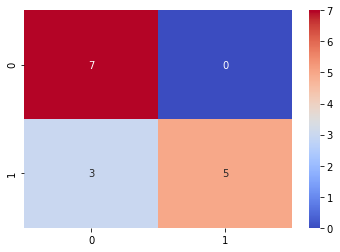

In [46]:
sns.heatmap(cm_svc,annot = True,cmap='coolwarm', fmt = "d")

In [47]:
f_score_knn = f1_score(y_test3, y_test_prediction_svc)

print(' F-Score is : '+str(f_score_knn))

 F-Score is : 0.8235294117647058
